Introduction

The RMS Titanic, often remembered as a symbol of early 20th-century maritime ambition, tragically became an enduring emblem of disaster and human loss. Launched in 1912, the Titanic was celebrated as the largest and most luxurious ocean liner of its time, a marvel of engineering and opulence. Its first voyage from Southampton to New York City was a highly anticipated event, a true worldwide spectacle


However, this inaugural journey abruptly turned into one of history's most poignant tragedies. On the night of April 14, 1912, the Titanic struck a massive iceberg in the North Atlantic Ocean. The collision resulted in ship's sinking in the early hours of April 15, leading to many casualties, such as over 1,500 lost lives, from a total of over 2,200 passengers and crew. This catastrophic event shocked the world, highlighting the fallibility of even the most advanced technological achievements and leading to significant improvements in maritime safety regulations.
The Titanic dataset, a compilation of passenger and crew information, serves as a gateway to understanding this historic event through the lens of data analysis. It provides details such as passenger class, age, gender, family size, ticket fare, and embarkation point, offering a snapshot of the socio-economic diversity aboard the ill-fated vessel. By analyzing this dataset, we can glean insights into how these variables may have influenced the chances of survival during the disaster.

Data Exploration and Analysis

In the data exploration and cleaning phase for the Titanic dataset analysis, we start by importing necessary libraries and loading the dataset using pandas. Thepds.read_csv() function is utilized to import the Titanic data into a DataFrame, allowing for easy manipulation and analysis.


In [1]:
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

Initially, a thorough examination of the dataset is conducted using functions like df.head() for a preview of the data and pd.info() to understand data types and identify columns with missing values. The pd.describe() function provides a statistical summary of numerical columns, offering insights into distributions and potential outliers.

In [2]:
# Handling missing values
# Option 1: Fill missing 'Age' values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
# Option 2: Drop the 'Cabin' column due to a high number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)
# Option 3: Fill missing 'Embarked' values with the mode (most common value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

Additionally, transforming categorical variables into a numerical format is essential for certain types of analysis. This is achieved using techniques like one-hot encoding or label encoding. For example, the 'Sex' column, which contains gender information, can be converted using a mapping function: df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).

In [3]:
# Data type conversion
# Convert 'Sex' to a categorical variable
titanic_data['Sex'] = titanic_data['Sex'].astype('category')

# Convert 'Embarked' to a categorical variable
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')

# Feature engineering
# Creating a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Categorizing 'Age' into groups (Optional)
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)


Additionally, transforming categorical variables into a numerical format is essential for certain types of analysis. This is achieved using techniques like one-hot encoding or label encoding. For example, the 'Sex' column, which contains gender information, can be converted using a mapping function: df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).

Exploratory Data Analysis
1.	Data Overview: The Titanic dataset includes various features like Passenger Class (Pclass), Name, Sex, Age, Siblings/Spouses Aboard (SibSp), Parents/Children Aboard (Parch), Ticket Number, Fare, Cabin, and Embarkation Point (Embarked). The target variable is Survival, indicating whether a passenger survived the disaster.


In [4]:
# Display the cleaned dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize     AgeGroup  
0      0         A/5 21171   7.2500        S           1  Young Adult  
1      0          PC 17599  71.2833        C           1        Adult  
2      0  STON/O2. 3101282   7.9250        S           0  Young Adult  
3      0            113803  53.1

2.	Feature Analysis:
•	Passenger Class (Pclass): Analysis of this categorical variable can reveal the socio-economic distribution of passengers and its impact on survival rates.
•	Sex and Age: Investigating these features helps in understanding demographic patterns and their influence on survival. Visualizations like bar graphs for gender-based survival and age histograms provide clear insights.
•	Family Size: Combining SibSp and Parch to create a 'Family Size' feature can show the effect of traveling with family on survival.
3.	Correlation with Survival: Analyzing how different features correlate with the survival rate is key. For instance, higher survival rates among women and children, and variations in survival rates across different passenger classes.
4.	Data Visualization: Utilizing plots such as histograms, bar charts, and box plots helps in visualizing the distribution of various features and their relationship with survival. For example, a bar chart showing the survival rate across different classes or a box plot of ages in different Pclass categories.



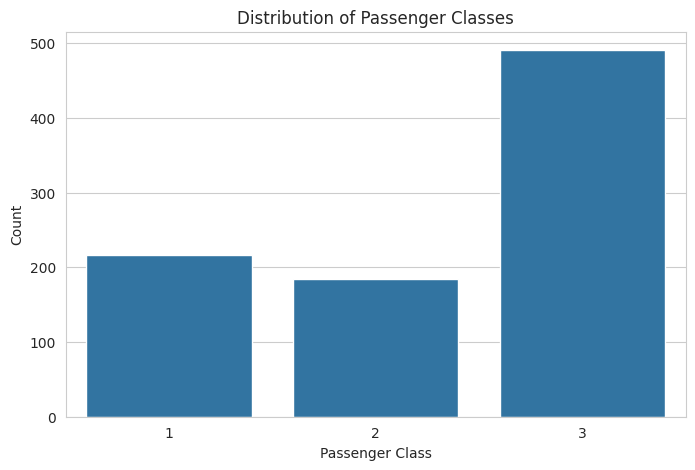

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of passenger classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


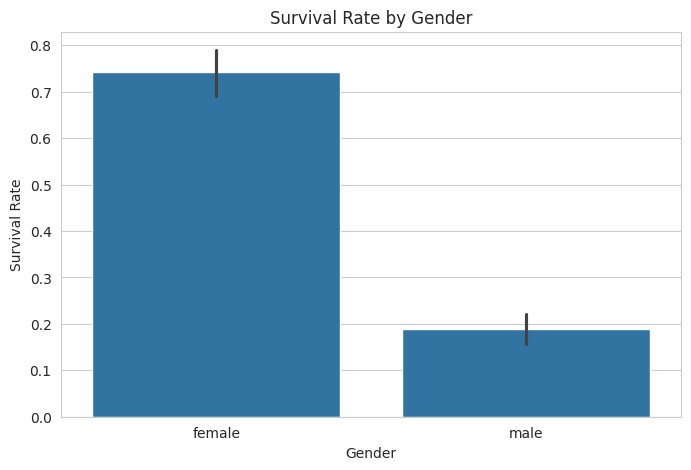

In [6]:
# Plotting survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


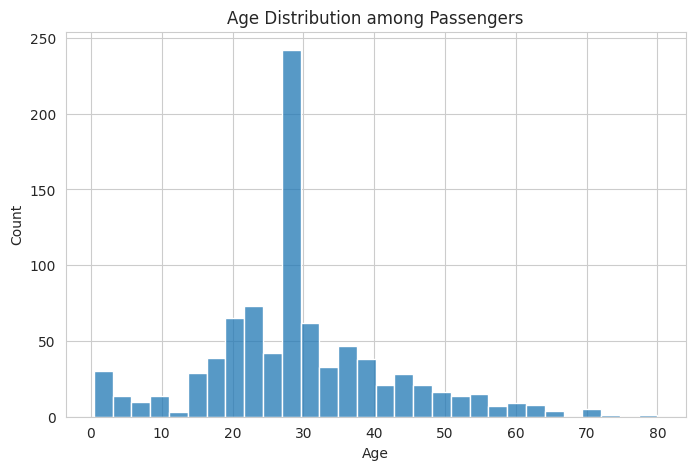

In [7]:
# Histogram for age distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['Age'], bins=30, kde=False)
plt.title('Age Distribution among Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Queries

Q- How did survival rates differ between different passenger classes?


In [8]:
# Survival rate by passenger class
print(titanic_data.groupby('Pclass')['Survived'].mean())

# Survival rate by gender
print(titanic_data.groupby('Sex')['Survived'].mean())

# Survival rate by age groups
print(titanic_data.groupby('AgeGroup')['Survived'].mean())


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
AgeGroup
Child          0.573529
Teenager       0.488889
Young Adult    0.344383
Adult          0.416268
Senior         0.240000
Name: Survived, dtype: float64


/tmp/ipykernel_3980/3787010155.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_data.groupby('Sex')['Survived'].mean())
/tmp/ipykernel_3980/3787010155.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_data.groupby('AgeGroup')['Survived'].mean())


Q- Did family size impact survival chances?!

In [9]:
# Survival rate by family size
print(titanic_data.groupby('FamilySize')['Survived'].mean())

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


QQ- How did the point of embarkation relate to survival rates?

In [10]:
# Survival rate by point of embarkation
print(titanic_data.groupby('Embarked')['Survived'].mean())

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


/tmp/ipykernel_3980/1260500636.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_data.groupby('Embarked')['Survived'].mean())


Q- Was there a correlation between fare price and survival?!

In [11]:
# Correlation between fare and survival
print(titanic_data[['Fare', 'Survived']].corr())

              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000


Q- How did age and sex together influence survival odds?

In [12]:
# Survival rate by age and gender
print(titanic_data.groupby(['Sex', 'AgeGroup'])['Survived'].mean())
# Creating a new column 'CabinAvailable' indicating whether cabin information is available
titanic_data['CabinAvailable'] = titanic_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)


Sex     AgeGroup   
female  Child          0.593750
        Teenager       0.826087
        Young Adult    0.730337
        Adult          0.792208
        Senior         1.000000
male    Child          0.555556
        Teenager       0.136364
        Young Adult    0.156164
        Adult          0.196970
        Senior         0.095238
Name: Survived, dtype: float64


/tmp/ipykernel_3980/2305371159.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_data.groupby(['Sex', 'AgeGroup'])['Survived'].mean())


KeyError: 'Cabin'

Q- Did the presence of cabins (cabin data availability) affect survival rates?

In [ ]:
# Survival rate based on cabin availability
print(titanic_data.groupby('CabinAvailable')['Survived'].mean())

Q- What was the distribution of passengers by age, gender, and class?

In [ ]:
# Distribution of passengers by age
print(titanic_data['AgeGroup'].value_counts())

# Distribution of passengers by gender
print(titanic_data['Sex'].value_counts())

# Distribution of passengers by class
print(titanic_data['Pclass'].value_counts())


In-depth analysis

Data cleaning also involves feature engineering, where new relevant features are created from existing data. An example is creating a 'FamilySize' feature by summing 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard).
The cleaned and preprocessed dataset is then ready for exploratory data analysis, where we can delve deeper into understanding the relationships between different variables and their impact on survival rates. This preparatory step is crucial for any subsequent statistical analysis or predictive modeling.

1.	Dataset Composition: The dataset contains 891 entries with 12 columns. These columns are Passenger, Survived, Pclass (Passenger Class), Name, Sex, Age, SibSp (Siblings/Spouses Aboard), Parch (Parents/Children Aboard), Ticket, Fare, Cabin, and Embarked (Port of Embarkation).
2.	Missing Values: There are missing values in the Age, Cabin, and Embarked columns. Specifically:
•	Age has 714 out of 891 non-null entries, suggesting a need for imputation or handling of missing data.
•	Cabin has a significant amount of missing data, with only 204 non-null entries. This might limit its use in analysis unless the missing data is addressed.
•	Embarked has 889 non-null entries, indicating only a few missing values.
3.	Statistical Overview:
•	Survived: The mean survival rate is approximately 38.4%, indicating that less than half of the passengers in this dataset survived.
•	Pclass: The mean passenger class is around 2.3, suggesting a slightly higher number of passengers in the lower classes (2nd and 3rd).
•	Age: The average age of passengers is about 29.7 years, with a standard deviation of 14.5 years. The age range is broad, from 0.42 to 80 years.
•	SibSp and Parch: Most passengers did not travel with siblings, spouses, parents, or children. This suggests that a large number of passengers were traveling alone.
•	Fare: There is a wide range in ticket fares, from 0 to 512.33, with a mean fare of about 32.20. This variation in fare might correlate with passenger class.


Conclusion
The analysis of the Titanic dataset provides insightful revelations about the socio-economic and demographic factors influencing survival rates during the tragic maritime disaster. Key findings indicate that passenger class had a significant impact on survival chances, with first-class passengers enjoying higher survival rates, likely due to better access to lifeboats and emergency resources. Gender played a crucial role, as women had markedly higher survival rates, reflecting the era's societal norms and the "women and children first" policy during the evacuation process.
Age was another determining factor, where children and younger passengers had a higher likelihood of survival compared to older passengers. This could be attributed to prioritization in rescue efforts. Family size also influenced survival odds, with those having small to medium-sized families faring better than those traveling alone or with large families.
Additionally, the fare paid and embarkation point emerged as significant variables, suggesting a link between economic status, point of origin, and survival probability.
These insights not only shed light on the human aspects of the Titanic disaster but also illustrate broader social themes of inequality and privilege. The analysis serves as a poignant reminder of how, even in times of crisis, social hierarchies and human biases can profoundly impact outcomes
